This code is used for generating demonstration of our multi-view clustering algorithm for grouping variables 

{'Q_tilde': '../diagrams/materials/q_tilde.svg',
 'Positive Q_tilde': '../diagrams/materials/positive_q_tilde.svg',
 'Negative Q_tilde': '../diagrams/materials/negative_q_tilde.svg',
 'Laplacian Positive': '../diagrams/materials/laplacian_positive.svg',
 'Laplacian Negative': '../diagrams/materials/laplacian_negative.svg',
 'Feature Matrix Positive': '../diagrams/materials/feature_matrix_positive.svg',
 'Feature Matrix Negative': '../diagrams/materials/feature_matrix_negative.svg',
 'Combined Feature Matrix': '../diagrams/materials/combined_feature_matrix.svg'}

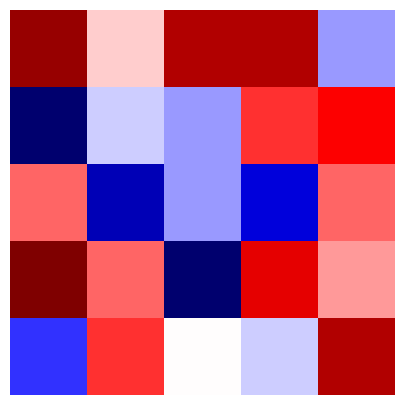

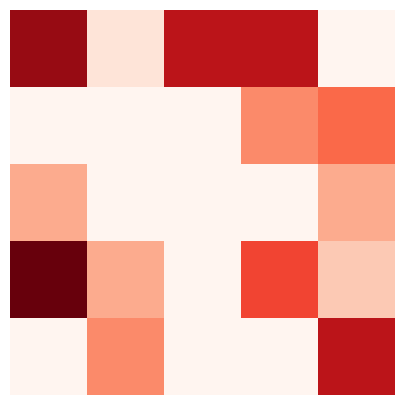

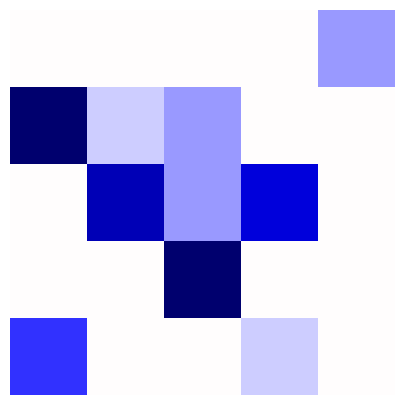

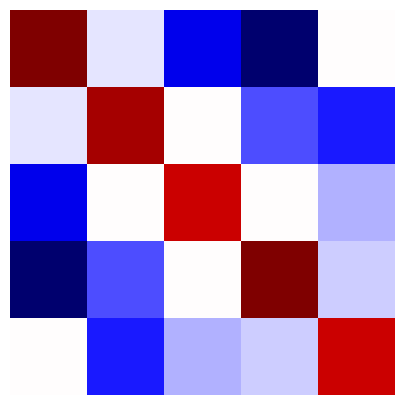

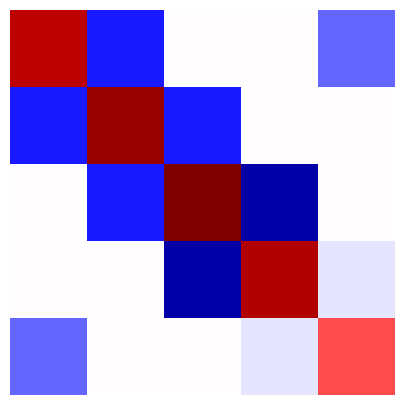

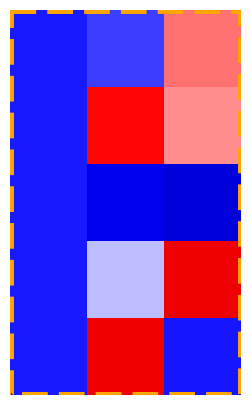

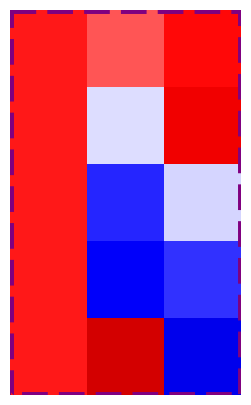

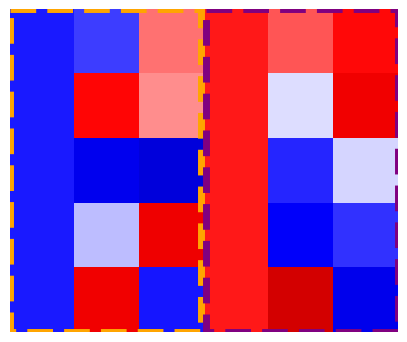

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate a random 5x5 q_tilde matrix with values ranging from -10 to 10
q_tilde = np.random.randint(-10, 11, size=(5, 5))

# Separate q_tilde into positive and negative components
positive_q_tilde = np.maximum(q_tilde, 0)
negative_q_tilde = np.maximum(-q_tilde, 0)

# Function to compute the normalized Laplacian
def compute_laplacian(S):
    S = (S + S.T) / 2
    D = np.diag(np.sum(S, axis=1))
    L = D - S
    return L

# Compute the Laplacians
laplacian_positive = compute_laplacian(positive_q_tilde)
laplacian_negative = compute_laplacian(negative_q_tilde)

# Function to extract eigenvectors corresponding to the smallest eigenvalues
def get_eigenvectors(L, n_vectors=3):
    eigvals, eigvecs = np.linalg.eigh(L)
    return eigvecs[:, np.argsort(eigvals)[:n_vectors]]

# Compute the feature matrices
feature_matrix_positive = get_eigenvectors(laplacian_positive)
feature_matrix_negative = get_eigenvectors(laplacian_negative)

# Combine the feature matrices
combined_feature_matrix = np.hstack((feature_matrix_positive, feature_matrix_negative))

# Function to save a matrix as a svg with a border at the edge
def save_matrix_as_svg_with_edge_border(matrix, title, cmap, vmin, vmax, filename, border_color=None):
    plt.figure(figsize=(5, 5))
    plt.imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)
    
    if border_color:
        # Add a border at the edge
        ax = plt.gca()
        rect = plt.Rectangle((-0.5, -0.5), matrix.shape[1], matrix.shape[0],
                             linewidth=5, edgecolor=border_color, facecolor='none')
        ax.add_patch(rect)
    
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight')

# Save the matrices without borders
save_matrix_as_svg_with_edge_border(q_tilde, 'W', 'seismic', -10, 10, '../diagrams/materials/q_tilde.svg')
save_matrix_as_svg_with_edge_border(positive_q_tilde, '$W_+$', 'Reds', 0, 10, '../diagrams/materials/positive_q_tilde.svg')
save_matrix_as_svg_with_edge_border(-negative_q_tilde, '$W_-$', 'seismic', -10, 10, '../diagrams/materials/negative_q_tilde.svg')
save_matrix_as_svg_with_edge_border(laplacian_positive, '$L_+$', 'seismic', -10, 10, '../diagrams/materials/laplacian_positive.svg')
save_matrix_as_svg_with_edge_border(laplacian_negative, '$L_-$', 'seismic', -10, 10, '../diagrams/materials/laplacian_negative.svg')

def save_matrix_as_svg_with_dashed_border(matrix, title, cmap, vmin, vmax, filename, border_color=None):
    plt.figure(figsize=(5, 5))
    plt.imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)
    
    if border_color:
        # Add a dashed border at the edge
        ax = plt.gca()
        rect = plt.Rectangle((-0.5, -0.5), matrix.shape[1], matrix.shape[0],
                             linewidth=5, edgecolor=border_color, facecolor='none', linestyle='--')
        ax.add_patch(rect)
    
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight')

# Save the feature matrices with dashed borders in contrasting colors
save_matrix_as_svg_with_dashed_border(feature_matrix_positive, '$U_+$', 'seismic', -1, 1, 
                                      '../diagrams/materials/feature_matrix_positive.svg', 
                                      border_color='orange')
save_matrix_as_svg_with_dashed_border(feature_matrix_negative, '$U_-$', 'seismic', -1, 1, 
                                      '../diagrams/materials/feature_matrix_negative.svg', 
                                      border_color='purple')

def save_combined_matrix_with_pixel_adjusted_dashed_borders(matrix, title, cmap, vmin, vmax, filename, left_border_color, right_border_color, dpi=100):
    plt.figure(figsize=(5, 5), dpi=dpi)
    plt.imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax)
    
    ax = plt.gca()

    # Get the transformation from data to display coordinates
    trans = ax.transData

    # Create a unit vector (1 data unit in x direction)
    unit_vector = trans.transform([(0, 0), (1, 0)])
    data_to_pixel_ratio = abs(unit_vector[1][0] - unit_vector[0][0])

    # Convert 2.5 pixels to data units
    pixel_adjustment = 2.5 / data_to_pixel_ratio

    # Left rectangle: reduce width by the equivalent of 2.5 pixels
    left_rect = plt.Rectangle((-0.5, -0.5), matrix.shape[1]//2 - pixel_adjustment, matrix.shape[0],
                              linewidth=5, edgecolor=left_border_color, facecolor='none', linestyle='--')
    ax.add_patch(left_rect)
    
    # Right rectangle: reduce width by 2.5 pixels and shift start by 2.5 pixels
    right_rect = plt.Rectangle((matrix.shape[1]//2 + pixel_adjustment - 0.5, -0.5), 
                               matrix.shape[1]//2 - pixel_adjustment, matrix.shape[0],
                               linewidth=5, edgecolor=right_border_color, facecolor='none', linestyle='--')
    ax.add_patch(right_rect)
    
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight')

# Save the combined feature matrix with custom dashed borders in contrasting colors
save_combined_matrix_with_pixel_adjusted_dashed_borders(combined_feature_matrix, 'U', 'seismic', -1, 1, 
                                                        '../diagrams/materials/combined_feature_matrix.svg', 
                                                        left_border_color='orange', right_border_color='purple', dpi=100)



# Provide the file paths for download
file_paths = {
    "Q_tilde": "../diagrams/materials/q_tilde.svg",
    "Positive Q_tilde": "../diagrams/materials/positive_q_tilde.svg",
    "Negative Q_tilde": "../diagrams/materials/negative_q_tilde.svg",
    "Laplacian Positive": "../diagrams/materials/laplacian_positive.svg",
    "Laplacian Negative": "../diagrams/materials/laplacian_negative.svg",
    "Feature Matrix Positive": "../diagrams/materials/feature_matrix_positive.svg",
    "Feature Matrix Negative": "../diagrams/materials/feature_matrix_negative.svg",
    "Combined Feature Matrix": "../diagrams/materials/combined_feature_matrix.svg"
}

file_paths

